<a href="https://colab.research.google.com/github/rosanaalessandra/Projeto_AirBnB/blob/main/Projeto_Case_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pergunta de negócio:

1. Faça uma análise exploratória de dados com a base de dados do Airbnb e indique possíveis oportunidades e/ou ameaças para o empreendimento.





## Análise de Dados:

1. O quê? Serão analisados informações sobre a localização, preços, tipo de acomodações, avaliação dos hóspedes, entre outros.

2. Por quê? Entender e identificar baseado nas escolhas do público a preferência de sua escolha.

3. Quem? Os stakeholders , os anfitriões e hóspedes.

4. Quando? Identificar como são as preferências dos hóspedes e a demanda.

5. Onde? Analisar a localização por áreas com maior interesse.

Fontes de Pesquisa
1. http://insideairbnb.com/get-the-data/
2. https://www.sciencedirect.com/science/article/pii/S0261517721000388?via%3Dihub#bib1
3. https://www.youtube.com/watch?v=AzgQtSjSQ2s

# Analista





Escola: SoulCode Academy

Curso: Bootcamp Analista de Dados - Martech - AD2

Projeto Case Airbnb

Professores: Franciane Rodrigues

Aluno: Rosana Alessandra da Silva Santos


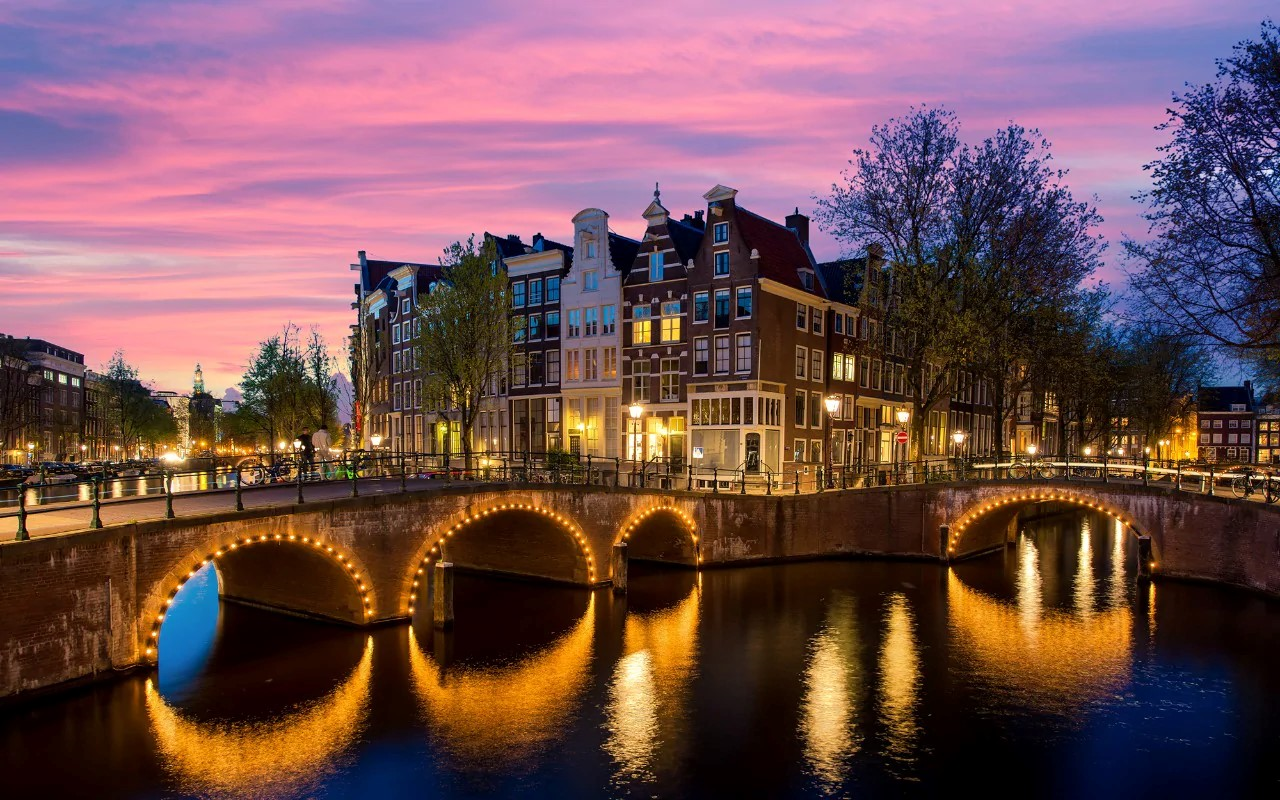

# Sobre a Empresa:   


*O Airbnb é considerado a maior empresa hoteleira da atualidade. Ah, o detalhe é que ela não possui nenhum hotel! Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para possibilitar essa hospedagem alternativa. No final de 2018, a Startup fundada há 10 anos já havia hospedado mais de 300 milhões de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do seu site referentes a algumas das principais cidades do mundo.

# Instalações e Importações

In [ ]:
# Instalação para poder acessar GCP caso queira buscar o arquivo no bucket do GCP
 #pip install gcsfs

In [ ]:
!pip install gcsfs
!pip install pandera

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.6/201.6 kB 7.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import os
from google.colab import drive
from  google.cloud import storage # pegar o arquivo pelo bucket do GCP

In [ ]:
# Ignorar avisos (Executar código)
import warnings
warnings.filterwarnings("ignore")

# Extração

###**Google Drive**

In [ ]:
# Caminho do arquivo que está no Drive do google
path = '/content/airbnb (1).csv'

In [ ]:
 # Comando de abertura para Google Drive (Executar código)

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv(path)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###**Google Cloud**

In [ ]:
# Permite acesso a sua GCP
# Comando para configurar a chave de segurança - Acesso ao projeto
#serviceAccount = '/content/sample_data/aula13-390016-702f69b65caa.json' # Aqui vamos por a chave json de acesso ao cloud
#os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = serviceAccount

In [ ]:
# Configuração Google Cloud Storage - Acesso ao bucket
#client = storage.Client()                         #Caminho do arquivo no bucket
#bucket = client.get_bucket('aula_fran')  #nome do bucket
#bucket.blob('/content/drive/MyDrive/airbnb.csv')    #nome do arquivo da base de dados bruto dentro da bucket
#path = 'gs://aula_fran/AirBnb_arquivo/Arquivo_bruto/airbnb.csv'     #gsutil

In [ ]:
#df = pd.read_csv(path,
                 #sep=',',
                 #encoding='ISO-8859-1',
                 #dayfirst = True)
#dfback = df.copy()

## **Pré-Análise**

In [ ]:
# Visualização do dataframe
df

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,0,194.033698,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772
1,1,344.245776,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432
2,2,264.101422,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103
3,3,433.529398,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663
4,4,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,1098,2486.115342,Entire home/apt,False,False,2.0,False,0,0,10.0,100.0,1,2.375833,1.436054,181.198355,9.594573,225.304203,15.699521,4.85869,52.37677
1099,1099,233.637194,Private room,False,True,2.0,False,1,0,10.0,90.0,1,4.719736,0.322263,108.024880,5.719989,134.775277,9.391335,4.83611,52.34910
1100,1100,317.062311,Private room,False,True,2.0,False,1,0,10.0,92.0,1,0.598355,0.751993,440.476515,23.323524,625.947562,43.616927,4.88897,52.37798
1101,1101,1812.855904,Entire home/apt,False,False,4.0,False,0,0,8.0,84.0,5,1.943020,0.388532,257.948105,13.658524,336.589237,23.454022,4.90688,52.35794


In [ ]:
df.head()

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,0,194.033698,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772
1,1,344.245776,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432
2,2,264.101422,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103
3,3,433.529398,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663
4,4,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508


In [ ]:
# Visualização do df de forma aleatória

df.sample(5)

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
908,908,393.925902,Private room,False,True,4.0,False,0,1,10.0,100.0,1,2.176979,0.734409,211.895028,11.219983,257.697350,17.956722,4.91856,52.36140
833,833,467.040049,Private room,False,True,2.0,False,1,0,10.0,94.0,1,0.222465,0.450670,692.771034,36.682687,815.779416,56.844683,4.89463,52.37500
1074,1074,233.637194,Private room,False,True,2.0,False,1,0,9.0,93.0,1,2.784104,1.909814,146.544806,7.759645,184.548180,12.859583,4.93393,52.37457
20,20,243.245143,Private room,False,True,2.0,True,1,0,10.0,96.0,1,2.870633,1.278894,169.695755,8.985503,210.267692,14.651755,4.85206,52.36734
218,218,400.487428,Private room,False,True,2.0,False,0,1,10.0,94.0,0,0.830714,0.451412,487.450320,25.810818,969.642304,67.566071,4.89540,52.36590


In [ ]:
# Verificar o tipo de dado em cada coluna
df.dtypes

Unnamed: 0                      int64
realSum                       float64
room_type                      object
room_shared                      bool
room_private                     bool
person_capacity               float64
host_is_superhost                bool
multi                           int64
biz                             int64
cleanliness_rating            float64
guest_satisfaction_overall    float64
bedrooms                        int64
dist                          float64
metro_dist                    float64
attr_index                    float64
attr_index_norm               float64
rest_index                    float64
rest_index_norm               float64
lng                           float64
lat                           float64
dtype: object

In [ ]:
# Informações detalhadas do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103 entries, 0 to 1102
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  1103 non-null   int64  
 1   realSum                     1103 non-null   float64
 2   room_type                   1103 non-null   object 
 3   room_shared                 1103 non-null   bool   
 4   room_private                1103 non-null   bool   
 5   person_capacity             1103 non-null   float64
 6   host_is_superhost           1103 non-null   bool   
 7   multi                       1103 non-null   int64  
 8   biz                         1103 non-null   int64  
 9   cleanliness_rating          1103 non-null   float64
 10  guest_satisfaction_overall  1103 non-null   float64
 11  bedrooms                    1103 non-null   int64  
 12  dist                        1103 non-null   float64
 13  metro_dist                  1103 

In [ ]:
# Backup local do dataframe
dfback1 = df.copy()

In [ ]:
df # DataFrame

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,0,194.033698,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772
1,1,344.245776,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432
2,2,264.101422,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103
3,3,433.529398,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663
4,4,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,1098,2486.115342,Entire home/apt,False,False,2.0,False,0,0,10.0,100.0,1,2.375833,1.436054,181.198355,9.594573,225.304203,15.699521,4.85869,52.37677
1099,1099,233.637194,Private room,False,True,2.0,False,1,0,10.0,90.0,1,4.719736,0.322263,108.024880,5.719989,134.775277,9.391335,4.83611,52.34910
1100,1100,317.062311,Private room,False,True,2.0,False,1,0,10.0,92.0,1,0.598355,0.751993,440.476515,23.323524,625.947562,43.616927,4.88897,52.37798
1101,1101,1812.855904,Entire home/apt,False,False,4.0,False,0,0,8.0,84.0,5,1.943020,0.388532,257.948105,13.658524,336.589237,23.454022,4.90688,52.35794


## Legenda de Dados:

1. Quartos =	Número de quartos
2. person_capacity =	Número máximo de hóspedes
3. room_private =	 quartos privados
4. room_shared =	quartos compartilhados
5. limpeza	= Comentários de clientes: Scale to 10
6. guest_satisfaction =	Comentários de clientes: Scale to 100
7. Superhost = hosts com o status de superhost
8. multi	= listagens oferecidas por anfitriões com 2 a 4 listagens
9. Biz	= anúncios oferecidos por anfitriões com mais de 4 anúncios
10. Dist = distância do centro da cidade em quilômetros
11. metro_dist = estação de metrô mais próxima em quilômetros
12. attr_index =	índice de atração: escala até 100






In [ ]:
# Visualização do dataframe de forma aleatória:
df.sample(5)

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
449,449,704.192346,Entire home/apt,False,False,4.0,False,0,0,9.0,100.0,3,3.704995,2.291026,104.045506,5.509279,131.795937,9.183730,4.89942,52.40631
465,465,718.955780,Entire home/apt,False,False,2.0,False,1,0,9.0,97.0,1,3.910852,0.932888,137.876149,7.300634,184.285407,12.841272,4.84832,52.35123
55,55,319.640053,Private room,False,True,2.0,False,0,1,9.0,95.0,1,0.360507,0.223507,1030.281140,54.554071,761.552854,53.066099,4.89837,52.37355
817,817,653.574860,Entire home/apt,False,False,2.0,False,0,1,10.0,100.0,1,0.894665,0.384204,381.105122,20.179769,469.967703,32.748026,4.90624,52.37321
883,883,552.808567,Private room,False,True,4.0,False,0,0,8.0,95.0,2,4.547374,0.871913,114.410499,6.058112,141.374877,9.851205,4.90158,52.33269


In [ ]:
df.dtypes # retorna uma série com o tipo de dados de cada coluna.

Unnamed: 0                      int64
realSum                       float64
room_type                      object
room_shared                      bool
room_private                     bool
person_capacity               float64
host_is_superhost                bool
multi                           int64
biz                             int64
cleanliness_rating            float64
guest_satisfaction_overall    float64
bedrooms                        int64
dist                          float64
metro_dist                    float64
attr_index                    float64
attr_index_norm               float64
rest_index                    float64
rest_index_norm               float64
lng                           float64
lat                           float64
dtype: object

In [ ]:
df.info() # Para obter uma visão geral rápida do conjunto de dados.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103 entries, 0 to 1102
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  1103 non-null   int64  
 1   realSum                     1103 non-null   float64
 2   room_type                   1103 non-null   object 
 3   room_shared                 1103 non-null   bool   
 4   room_private                1103 non-null   bool   
 5   person_capacity             1103 non-null   float64
 6   host_is_superhost           1103 non-null   bool   
 7   multi                       1103 non-null   int64  
 8   biz                         1103 non-null   int64  
 9   cleanliness_rating          1103 non-null   float64
 10  guest_satisfaction_overall  1103 non-null   float64
 11  bedrooms                    1103 non-null   int64  
 12  dist                        1103 non-null   float64
 13  metro_dist                  1103 

In [ ]:
# Backup local do dataframe
dfback1 = df.copy()

# **TRANSFORMAÇÃO**

## Colunas a serem analisadas


1. room_type: tipo de quarto oferecido
2. room_private: se o quarto é privativo ou não
3. multi: listagens oferecidas por anfitriões com 2 a 4 listagens
4. biz:  anúncios oferecidos por anfitriões com mais de 4 anúncios
5. cleanliness_rating: Classificação de limpeza
6. guest_satisfaction_overall: satisfação geral do hóspede
7. bedrooms: número de quartos
8. dist: distância do centro da cidade em quilómetros
9. attr_index:	índice de atração: escala até 100
10. metro_dist: a distância da estação de metrô mais próxima
11. rest_index	Índice de restaurantes: escala até 100





In [ ]:
# Visualização do datafarme de forma aleatória:
df.sample(10)

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
565,565,539.216835,Private room,False,True,4.0,False,0,1,10.0,96.0,1,0.972105,0.467596,363.975910,19.272766,443.291474,30.889188,4.90737,52.37351
31,31,599.676611,Entire home/apt,False,False,4.0,False,0,0,9.0,94.0,3,3.363591,0.697422,156.237115,8.272859,198.874121,13.857835,4.90806,52.34442
529,529,571.321444,Entire home/apt,False,False,2.0,True,1,0,10.0,100.0,1,1.897924,1.908061,199.727587,10.575708,263.960718,18.393163,4.87325,52.38521
534,534,909.474375,Entire home/apt,False,False,4.0,True,0,0,9.0,97.0,2,3.124792,0.549154,198.368733,10.503756,244.277988,17.021642,4.88719,52.34538
834,834,1198.181520,Entire home/apt,False,False,4.0,False,1,0,10.0,100.0,2,1.062228,0.251361,413.610170,21.900933,519.533153,36.201818,4.90100,52.36500
540,540,583.975816,Private room,False,True,2.0,False,0,0,10.0,100.0,1,2.151923,1.643271,180.227974,9.543191,236.548413,16.483034,4.86899,52.38574
381,381,548.121763,Entire home/apt,False,False,3.0,False,0,0,10.0,97.0,2,3.046515,1.387820,176.019299,9.320339,217.090844,15.127202,4.85360,52.36038
644,644,287.769784,Private room,False,True,2.0,True,1,0,10.0,98.0,1,2.282736,0.191841,223.432535,11.830901,293.158452,20.427703,4.90860,52.35504
388,388,2061.959553,Entire home/apt,False,False,4.0,False,0,0,9.0,98.0,4,1.337129,0.375091,1861.001507,98.541266,498.411886,34.730057,4.89654,52.36140
711,711,313.312868,Private room,False,True,2.0,False,1,0,10.0,90.0,1,0.721579,0.593000,376.495387,19.935681,583.457757,40.656176,4.89156,52.37965


In [ ]:
# Renomeando as colunas
df.rename(columns={'room_type':'tipo_quarto',
                   'room_shared':'compartilhado',
                   'person_capacity':'capacidade',
                   'biz':'anuncios > 4 ',
                   'multi':'anuncios < 4 ',
                   'bedrooms':'numero_quartos',
                   'cleanliness_rating':'nota_limpeza',
                   'host_is_superhost':'superhost',
                   'guest_satisfaction_overall':'satisfacao',
                   'dist':'dist_centro_km',
                   'metro_dist':'dist_metro_km',
                   'realSum':'preco_total',
                   'attr_index':'indice_atracao',
                   'rest_index':'indice_restaurante',
                   'lat':'latitude',
                   'lng':'longitude'}, inplace = True)

In [ ]:
# Substituindo os valoes da coluna tipo_quarto.
df.loc[df.tipo_quarto == 'Private room', ['tipo_quarto']] = 'QUARTO_PRIVADO'
df.loc[df.tipo_quarto == 'Entire home/apt', ['tipo_quarto']] = 'QUARTO_INTEIRO'
df.loc[df.tipo_quarto == 'Shared room', ['tipo_quarto']] = 'QUARTO_COMPARTILHADO'

### Drop de Colunas

In [ ]:
# Retirada de colunas não utilizadas para a analise
df.drop(['preco_total',
         'compartilhado',
         'capacidade',
         'superhost',
         'anuncios > 4 ',
         'anuncios < 4 ',
         'attr_index_norm',
         'rest_index_norm',
         'longitude',
         'latitude',
         'room_private'],axis=1,inplace=True)

In [ ]:
df

,Unnamed: 0,tipo_quarto,nota_limpeza,satisfacao,numero_quartos,dist_centro_km,dist_metro_km,indice_atracao,indice_restaurante
0,0,QUARTO_PRIVADO,10.0,93.0,1,5.022964,2.539380,78.690379,98.253896
1,1,QUARTO_PRIVADO,8.0,85.0,1,0.488389,0.239404,631.176378,837.280757
2,2,QUARTO_PRIVADO,9.0,87.0,1,5.748312,3.651621,75.275877,95.386955
3,3,QUARTO_PRIVADO,9.0,90.0,2,0.384862,0.439876,493.272534,875.033098
4,4,QUARTO_PRIVADO,10.0,98.0,1,0.544738,0.318693,552.830324,815.305740
...,...,...,...,...,...,...,...,...,...
1098,1098,QUARTO_INTEIRO,10.0,100.0,1,2.375833,1.436054,181.198355,225.304203
1099,1099,QUARTO_PRIVADO,10.0,90.0,1,4.719736,0.322263,108.024880,134.775277
1100,1100,QUARTO_PRIVADO,10.0,92.0,1,0.598355,0.751993,440.476515,625.947562
1101,1101,QUARTO_INTEIRO,8.0,84.0,5,1.943020,0.388532,257.948105,336.589237


In [ ]:
# Checando dados Nulos , ausentes , etc
df.isna().sum()

Unnamed: 0            0
tipo_quarto           0
nota_limpeza          0
satisfacao            0
numero_quartos        0
dist_centro_km        0
dist_metro_km         0
indice_atracao        0
indice_restaurante    0
dtype: int64

In [ ]:
# Visualizando valores unicos para ver inconsistências. Utilizei a função sorted() para ordenação
print(sorted(pd.unique(df['tipo_quarto'])))

['QUARTO_COMPARTILHADO', 'QUARTO_INTEIRO', 'QUARTO_PRIVADO']


In [ ]:
# Visualizando valores unicos para ver inconsistências. Utilizei a função sorted() para ordenação
print(sorted(pd.unique(df['nota_limpeza'])))

[4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]


In [ ]:
# Visualizando valores unicos para ver inconsistências. Utilizei a função sorted() para ordenação
print(sorted(pd.unique(df['satisfacao'])))

[20.0, 47.0, 60.0, 65.0, 70.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0]


In [ ]:
# Visualizando valores unicos para ver inconsistências. Utilizei a função sorted() para ordenação
print(sorted(pd.unique(df['numero_quartos'])))

[0, 1, 2, 3, 4, 5]


In [ ]:
# Correção de inconsistência
df.replace(['***', '**NI'],pd.NA,inplace=True)
df.replace(pd.NA, np.NaN, inplace=True)        # Transformação de pd.NA para np.NaN (recomendado)

In [ ]:
# Visualizando valores unicos para ver inconsistências
print(pd.unique(df['dist_centro_km']))
print('-----------------------------------')
print(pd.unique(df['dist_metro_km']))

[5.0229638  0.48838929 5.74831192 ... 0.5983545  1.9430199  0.28020437]
-----------------------------------
[2.53938    0.23940392 3.65162129 ... 0.75199298 0.3885321  0.51621713]


In [ ]:
# Checando dados Nulos , ausentes , etc
df.isna().sum()

Unnamed: 0            0
tipo_quarto           0
nota_limpeza          0
satisfacao            0
numero_quartos        0
dist_centro_km        0
dist_metro_km         0
indice_atracao        0
indice_restaurante    0
dtype: int64

In [ ]:
# Tipos de dados
df.dtypes

Unnamed: 0              int64
tipo_quarto            object
nota_limpeza          float64
satisfacao            float64
numero_quartos          int64
dist_centro_km        float64
dist_metro_km         float64
indice_atracao        float64
indice_restaurante    float64
dtype: object

In [ ]:
# Criando um novo dataframe e escolhendo quais colunas do dataframe original
# quero trazer para esse novo dataframe
df_final = df[['tipo_quarto',
               'nota_limpeza',
               'satisfacao',
               'numero_quartos',
               'dist_centro_km',
               'dist_metro_km',
               'indice_atracao',
               'indice_restaurante']]

In [ ]:
dfbackup2 = df.copy()

In [ ]:
df # dataframe

,Unnamed: 0,tipo_quarto,nota_limpeza,satisfacao,numero_quartos,dist_centro_km,dist_metro_km,indice_atracao,indice_restaurante
0,0,QUARTO_PRIVADO,10.0,93.0,1,5.022964,2.539380,78.690379,98.253896
1,1,QUARTO_PRIVADO,8.0,85.0,1,0.488389,0.239404,631.176378,837.280757
2,2,QUARTO_PRIVADO,9.0,87.0,1,5.748312,3.651621,75.275877,95.386955
3,3,QUARTO_PRIVADO,9.0,90.0,2,0.384862,0.439876,493.272534,875.033098
4,4,QUARTO_PRIVADO,10.0,98.0,1,0.544738,0.318693,552.830324,815.305740
...,...,...,...,...,...,...,...,...,...
1098,1098,QUARTO_INTEIRO,10.0,100.0,1,2.375833,1.436054,181.198355,225.304203
1099,1099,QUARTO_PRIVADO,10.0,90.0,1,4.719736,0.322263,108.024880,134.775277
1100,1100,QUARTO_PRIVADO,10.0,92.0,1,0.598355,0.751993,440.476515,625.947562
1101,1101,QUARTO_INTEIRO,8.0,84.0,5,1.943020,0.388532,257.948105,336.589237


In [ ]:
df.dtypes

Unnamed: 0              int64
tipo_quarto            object
nota_limpeza          float64
satisfacao            float64
numero_quartos          int64
dist_centro_km        float64
dist_metro_km         float64
indice_atracao        float64
indice_restaurante    float64
dtype: object

In [ ]:
df.head()

,Unnamed: 0,tipo_quarto,nota_limpeza,satisfacao,numero_quartos,dist_centro_km,dist_metro_km,indice_atracao,indice_restaurante
0,0,QUARTO_PRIVADO,10.0,93.0,1,5.022964,2.539380,78.690379,98.253896
1,1,QUARTO_PRIVADO,8.0,85.0,1,0.488389,0.239404,631.176378,837.280757
2,2,QUARTO_PRIVADO,9.0,87.0,1,5.748312,3.651621,75.275877,95.386955
3,3,QUARTO_PRIVADO,9.0,90.0,2,0.384862,0.439876,493.272534,875.033098
4,4,QUARTO_PRIVADO,10.0,98.0,1,0.544738,0.318693,552.830324,815.305740


# Carregamento da Base de Dados Tratada

## Google drive

In [ ]:
 # Exportação em uma pasta Google Drive
#df.to_csv('/content/drive/MyDrive/airbnb.tratada.csv',index=False)

In [ ]:
# Exportação no Google Drive. Obs.: ao fechar o colab esse arquivo some. Recomendação: faça o download e coloque numa pasta do google drive
df.to_csv('/content/airbnb.tratada.csv', index=False)

In [ ]:
# Google Cloud
#df.to_csv('gs://aula_fran/AirBnb_arquivo/Arquivo_Tratado/airbnb.tratada.csv', index=False) # salva no bucket

In [ ]:
dfbackup3 = df_final.copy()

# **ANÁLISES**

### **Busca ou localização (query)**

In [ ]:
df_final

,tipo_quarto,nota_limpeza,satisfacao,numero_quartos,dist_centro_km,dist_metro_km,indice_atracao,indice_restaurante
0,QUARTO_PRIVADO,10.0,93.0,1,5.022964,2.539380,78.690379,98.253896
1,QUARTO_PRIVADO,8.0,85.0,1,0.488389,0.239404,631.176378,837.280757
2,QUARTO_PRIVADO,9.0,87.0,1,5.748312,3.651621,75.275877,95.386955
3,QUARTO_PRIVADO,9.0,90.0,2,0.384862,0.439876,493.272534,875.033098
4,QUARTO_PRIVADO,10.0,98.0,1,0.544738,0.318693,552.830324,815.305740
...,...,...,...,...,...,...,...,...
1098,QUARTO_INTEIRO,10.0,100.0,1,2.375833,1.436054,181.198355,225.304203
1099,QUARTO_PRIVADO,10.0,90.0,1,4.719736,0.322263,108.024880,134.775277
1100,QUARTO_PRIVADO,10.0,92.0,1,0.598355,0.751993,440.476515,625.947562
1101,QUARTO_INTEIRO,8.0,84.0,5,1.943020,0.388532,257.948105,336.589237


In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103 entries, 0 to 1102
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tipo_quarto         1103 non-null   object 
 1   nota_limpeza        1103 non-null   float64
 2   satisfacao          1103 non-null   float64
 3   numero_quartos      1103 non-null   int64  
 4   dist_centro_km      1103 non-null   float64
 5   dist_metro_km       1103 non-null   float64
 6   indice_atracao      1103 non-null   float64
 7   indice_restaurante  1103 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 69.1+ KB


In [ ]:
# Tabela resultante do nosso problema
df.head()

,Unnamed: 0,tipo_quarto,nota_limpeza,satisfacao,numero_quartos,dist_centro_km,dist_metro_km,indice_atracao,indice_restaurante
0,0,QUARTO_PRIVADO,10.0,93.0,1,5.022964,2.539380,78.690379,98.253896
1,1,QUARTO_PRIVADO,8.0,85.0,1,0.488389,0.239404,631.176378,837.280757
2,2,QUARTO_PRIVADO,9.0,87.0,1,5.748312,3.651621,75.275877,95.386955
3,3,QUARTO_PRIVADO,9.0,90.0,2,0.384862,0.439876,493.272534,875.033098
4,4,QUARTO_PRIVADO,10.0,98.0,1,0.544738,0.318693,552.830324,815.305740


### **Filtro**

In [ ]:
# Filtro para mais de 80% de satisfação

ft_alta_satisfacao = (df_final.satisfacao >= 80)

In [ ]:
df_final.loc[ft_alta_satisfacao]

,tipo_quarto,nota_limpeza,satisfacao,numero_quartos,dist_centro_km,dist_metro_km,indice_atracao,indice_restaurante
0,QUARTO_PRIVADO,10.0,93.0,1,5.022964,2.539380,78.690379,98.253896
1,QUARTO_PRIVADO,8.0,85.0,1,0.488389,0.239404,631.176378,837.280757
2,QUARTO_PRIVADO,9.0,87.0,1,5.748312,3.651621,75.275877,95.386955
3,QUARTO_PRIVADO,9.0,90.0,2,0.384862,0.439876,493.272534,875.033098
4,QUARTO_PRIVADO,10.0,98.0,1,0.544738,0.318693,552.830324,815.305740
...,...,...,...,...,...,...,...,...
1098,QUARTO_INTEIRO,10.0,100.0,1,2.375833,1.436054,181.198355,225.304203
1099,QUARTO_PRIVADO,10.0,90.0,1,4.719736,0.322263,108.024880,134.775277
1100,QUARTO_PRIVADO,10.0,92.0,1,0.598355,0.751993,440.476515,625.947562
1101,QUARTO_INTEIRO,8.0,84.0,5,1.943020,0.388532,257.948105,336.589237


In [ ]:
# Filtro para menos de 60% de satisfação

ft_baixa_satisfacao = (df_final['satisfacao'] <= 60)

In [ ]:
df_final.loc[ft_baixa_satisfacao]

,tipo_quarto,nota_limpeza,satisfacao,numero_quartos,dist_centro_km,dist_metro_km,indice_atracao,indice_restaurante
627,QUARTO_PRIVADO,4.0,47.0,1,3.809663,0.417682,122.940435,152.970546
853,QUARTO_INTEIRO,6.0,60.0,2,1.871276,1.933709,207.072639,263.188425
857,QUARTO_PRIVADO,10.0,60.0,1,0.556656,0.497848,439.995218,650.372566
901,QUARTO_PRIVADO,6.0,20.0,1,8.145037,0.688409,57.893170,74.226223
907,QUARTO_PRIVADO,6.0,60.0,1,8.069508,0.433365,59.104439,77.614487


In [ ]:
# Filtro para menos de 6% de nota_limpeza

ft_nota_limpeza = (df_final['nota_limpeza'] <= 6)

In [ ]:
df_final.loc[ft_nota_limpeza]

,tipo_quarto,nota_limpeza,satisfacao,numero_quartos,dist_centro_km,dist_metro_km,indice_atracao,indice_restaurante
64,QUARTO_INTEIRO,6.0,77.0,2,4.416817,0.446809,117.231069,148.952353
71,QUARTO_PRIVADO,6.0,88.0,1,0.944521,0.727107,320.239939,458.132692
239,QUARTO_PRIVADO,5.0,80.0,0,3.875694,0.533551,110.863573,140.465833
544,QUARTO_PRIVADO,6.0,70.0,1,2.432694,0.728726,343.814017,335.454751
626,QUARTO_INTEIRO,6.0,65.0,2,1.768897,1.585159,202.001797,262.838989
627,QUARTO_PRIVADO,4.0,47.0,1,3.809663,0.417682,122.940435,152.970546
653,QUARTO_INTEIRO,6.0,80.0,1,1.763043,1.895295,215.614725,278.917855
743,QUARTO_INTEIRO,6.0,80.0,1,1.908980,0.293735,495.386305,578.072106
823,QUARTO_PRIVADO,4.0,80.0,1,2.123892,0.415379,313.756885,378.684233
853,QUARTO_INTEIRO,6.0,60.0,2,1.871276,1.933709,207.072639,263.188425


### **GroupBy**

In [ ]:
# O método size() mostra a contagem de cada categoria.
df.groupby(['satisfacao']).size()

satisfacao
20.0       1
47.0       1
60.0       3
65.0       1
70.0       1
73.0       1
74.0       1
75.0       2
76.0       1
77.0       1
78.0       3
80.0      24
81.0       3
82.0       5
83.0       6
84.0      11
85.0      13
86.0      14
87.0      21
88.0      30
89.0      20
90.0      51
91.0      30
92.0      48
93.0      67
94.0      69
95.0      82
96.0     121
97.0      95
98.0     122
99.0      65
100.0    190
dtype: int64

In [ ]:
# O método size() mostra a contagem de cada categoria.
df.groupby(['tipo_quarto']).size()

tipo_quarto
QUARTO_COMPARTILHADO      6
QUARTO_INTEIRO          538
QUARTO_PRIVADO          559
dtype: int64

In [ ]:
# Tipos de quarto de acordo com a distancia do centro
df.groupby('tipo_quarto')['dist_centro_km'].sum().sort_values(ascending=False).head(10)

tipo_quarto
QUARTO_PRIVADO          1707.787482
QUARTO_INTEIRO          1402.685334
QUARTO_COMPARTILHADO      23.835472
Name: dist_centro_km, dtype: float64

In [ ]:
# O método size() mostra a contagem de cada categoria.
df.groupby(['nota_limpeza']).size()

nota_limpeza
4.0       2
5.0       1
6.0       9
7.0      11
8.0      87
9.0     334
10.0    659
dtype: int64

# **VISUALIZAÇÃO**

* Grafico de barras
* Gráfico de setores
* Grafico de linha
* Gráficos empilhados

* Pandas: https://pandas.pydata.org/docs/reference/frame.html
* Matplotlib: https://matplotlib.org/stable/plot_types/index
* Seaborn: https://seaborn.pydata.org/
* Bônus Plotly: https://plotly.com/python/getting-started/#jupyter-notebook-support

* Cores do matplotlib: https://matplotlib.org/stable/gallery/color/named_colors.html



In [ ]:
# Abertura de biblioteca de visualização
import matplotlib.pyplot as plt

### Duplicadas

In [ ]:
df_final

,tipo_quarto,nota_limpeza,satisfacao,numero_quartos,dist_centro_km,dist_metro_km,indice_atracao,indice_restaurante
0,QUARTO_PRIVADO,10.0,93.0,1,5.022964,2.539380,78.690379,98.253896
1,QUARTO_PRIVADO,8.0,85.0,1,0.488389,0.239404,631.176378,837.280757
2,QUARTO_PRIVADO,9.0,87.0,1,5.748312,3.651621,75.275877,95.386955
3,QUARTO_PRIVADO,9.0,90.0,2,0.384862,0.439876,493.272534,875.033098
4,QUARTO_PRIVADO,10.0,98.0,1,0.544738,0.318693,552.830324,815.305740
...,...,...,...,...,...,...,...,...
1098,QUARTO_INTEIRO,10.0,100.0,1,2.375833,1.436054,181.198355,225.304203
1099,QUARTO_PRIVADO,10.0,90.0,1,4.719736,0.322263,108.024880,134.775277
1100,QUARTO_PRIVADO,10.0,92.0,1,0.598355,0.751993,440.476515,625.947562
1101,QUARTO_INTEIRO,8.0,84.0,5,1.943020,0.388532,257.948105,336.589237


In [ ]:
# Verificação e retirada de duplicadas
import pandas as pd

# Montando um DataFrame genérico para estudarmos o conceito
df_duplicada = pd.DataFrame({'tipo_quarto',
                             'nota_limpeza'
                             'satisfacao',
                             'numero_quartos',
                             'dist_centr_km',
                             'dist_metro_km',
                             'indice_atracao',
                             'indice_restaurante'})

df_duplicada

,0
0,nota_limpezasatisfacao
1,indice_restaurante
2,numero_quartos
3,indice_atracao
4,dist_metro_km
5,tipo_quarto
6,dist_centr_km


# **Estatísticas descritivas**

In [ ]:
# Metodo descritivo para todas as colunas do df
df_final.describe()

,nota_limpeza,satisfacao,numero_quartos,dist_centro_km,dist_metro_km,indice_atracao,indice_restaurante
count,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000
mean,9.461469,94.362647,1.282865,2.841621,1.089439,271.009899,341.541187
std,0.798201,6.089691,0.740178,2.123245,0.836546,197.046890,236.611077
min,4.000000,20.000000,0.000000,0.015059,0.036530,40.931415,50.877318
25%,9.000000,92.000000,1.000000,1.302058,0.462983,127.909866,163.469245
50%,10.000000,96.000000,1.000000,2.341366,0.856010,208.180311,260.257028
75%,10.000000,98.000000,2.000000,3.648138,1.510629,386.442241,469.290623
max,10.000000,100.000000,5.000000,11.187100,4.411915,1888.550428,1435.102401


1. count= contar
2. mean= media
3. std= desvio padrão
4. min= mínimo
5. 25%= 1 quartil
6. 50%= 2 quartil
7. 75%= 3 quartil
8. max= máximo

# GRÁFICOS

### GRÁFICO BOX-PLOT MATPLOTLIB
- Descrição sobre como o gráfico da lib matplotlib a ser compreendido

- Observações: Se a escolha, é mostrar um gráfico box-plot, você precisa demonstrar com total clareza todos os dados... Quem são seus componentes ?
- Li, Ls, Q1, Q3, IQR, Max, Min, e outliers se hover.

### Calculos do Box plot

In [ ]:
# Criação do novo DataFrame com informações do describe()
df_satisfacao = pd.DataFrame(df_final['satisfacao'].describe())

# Cálculo dos limites superior e inferior
Q1 = df_satisfacao.loc['25%'][0]
Q3 = df_satisfacao.loc['75%'][0]
IQR = Q3 - Q1
limite_superior = Q3 + 1.5 * IQR
limite_inferior = Q1 - 1.5 * IQR

# Identificação dos outliers
outliers = df_final[(df_final['satisfacao'] < limite_inferior) | (df_final['satisfacao'] > limite_superior)]['satisfacao']

# Exibição do novo DataFrame e informações adicionais
print(df_satisfacao)
print("Limite Superior:", limite_superior)
print("Limite Inferior:", limite_inferior)
print("Primeiro Quartil:", Q1)
print("Terceiro Quartil:", Q3)
print("IQR:", IQR)
print("Outliers:")
print("Número de Outliers:", len(outliers))

        satisfacao
count  1103.000000
mean     94.362647
std       6.089691
min      20.000000
25%      92.000000
50%      96.000000
75%      98.000000
max     100.000000
Limite Superior: 107.0
Limite Inferior: 83.0
Primeiro Quartil: 92.0
Terceiro Quartil: 98.0
IQR: 6.0
Outliers:
Número de Outliers: 48


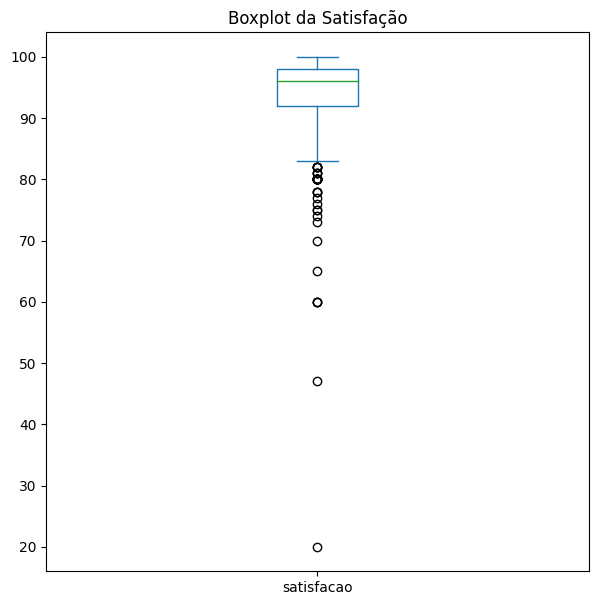

In [ ]:
import matplotlib.pyplot as plt

# Boxplot via Pandas do exemplo
ax = df_final.plot.box(column="satisfacao", figsize=(7, 7))
ax.set_title("Boxplot da Satisfação")

plt.show()

**RECOMENDAÇÃO: ENTENDENDO O GRÁFICO**
- COUNT DO GRÁFICO (TOTAL DE NOTAS ATRIBUIDAS A SATISFAÇÃO) : 1103
- MIN SATISFAÇÃO: 20.00 e 100
- MAX: 100.00
- MÉDIA: 94.36
- STD - 6.08
- Q1: 92.00
- Q3: 98.00
- LI: 83.00
- LS: 107.00
- OUTLIERS: 48

### GRÁFICO DE BARRAS MATPLOTLIB
- Pesquisa sobre como o gráfico da lib matplotlib para ser compreendido

#### GRÁFICO DE BARRAS RELACIONANDO A CONTAGEM DE NOTAS ATRIBUIDAS POR AGRUPAMENTODE NOTAS

In [ ]:
df_final['tipo_quarto'].value_counts()

QUARTO_PRIVADO          559
QUARTO_INTEIRO          538
QUARTO_COMPARTILHADO      6
Name: tipo_quarto, dtype: int64

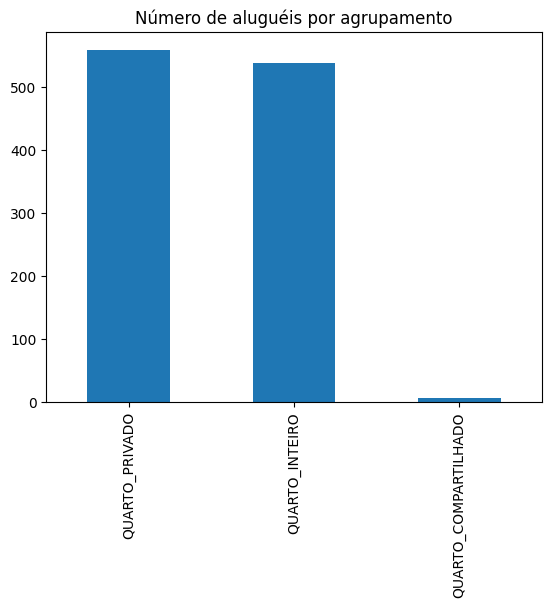

In [ ]:
df_bar_ = df_final['tipo_quarto'].value_counts().plot.bar()
#Titulo do gráfico
df_bar_.set_title("Número de aluguéis por agrupamento")

plt.show()

**ENTENDENDO O GRÁFICO**


- QUARTOS_PRIVADO: 559
- QUARTO_INTEIRO: 538
- QUARTO_COMPARTILHADO: 6

* Entire home/apt” é uma expressão em inglês que significa “casa/apartamento inteiro”. É uma opção de acomodação oferecida por plataformas de hospedagem como o Airbnb, onde o hóspede tem acesso exclusivo a todo o espaço da casa ou apartamento, sem compartilhá-lo com outras pessoas.

In [ ]:
df_final['nota_limpeza'].value_counts()

10.0    659
9.0     334
8.0      87
7.0      11
6.0       9
4.0       2
5.0       1
Name: nota_limpeza, dtype: int64

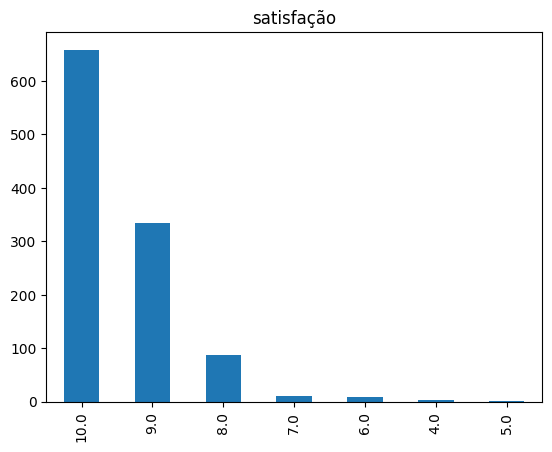

In [ ]:
df_bar_ = df_final['nota_limpeza'].value_counts().plot.bar()
#Titulo do gráfico
df_bar_.set_title("satisfação")

plt.show()

In [ ]:
df_final['satisfacao'].value_counts()

100.0    190
98.0     122
96.0     121
97.0      95
95.0      82
94.0      69
93.0      67
99.0      65
90.0      51
92.0      48
91.0      30
88.0      30
80.0      24
87.0      21
89.0      20
86.0      14
85.0      13
84.0      11
83.0       6
82.0       5
60.0       3
81.0       3
78.0       3
75.0       2
77.0       1
74.0       1
73.0       1
76.0       1
70.0       1
65.0       1
47.0       1
20.0       1
Name: satisfacao, dtype: int64

<Axes: ylabel='Frequency'>

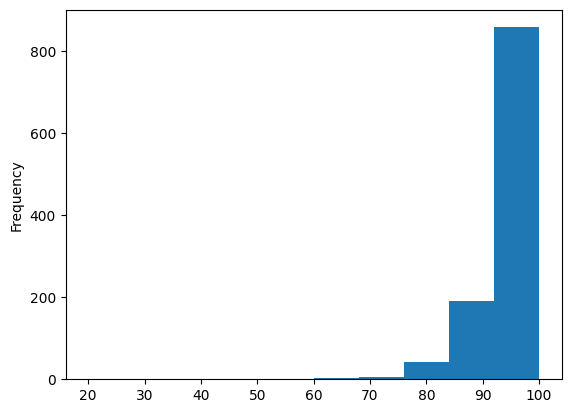

In [ ]:
df_final['satisfacao'].plot.hist()

In [ ]:
df_final['numero_quartos'].value_counts()

1    719
2    218
0     83
3     74
4      7
5      2
Name: numero_quartos, dtype: int64

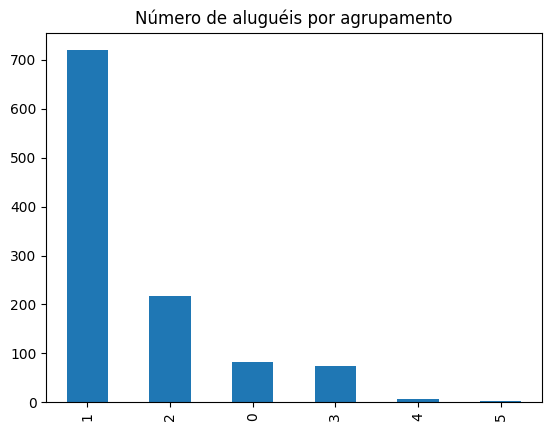

In [ ]:
df_bar_ = df_final['numero_quartos'].value_counts().plot.bar()
#Titulo do gráfico
df_bar_.set_title("Número de aluguéis por agrupamento")

plt.show()

In [ ]:
# Checando possíveis correlações
df_final.corr()

,nota_limpeza,satisfacao,numero_quartos,dist_centro_km,dist_metro_km,indice_atracao,indice_restaurante
nota_limpeza,1.000000,0.648809,-0.015326,-0.021712,0.019532,-0.006147,0.010937
satisfacao,0.648809,1.000000,0.104254,-0.059805,0.050810,0.006316,-0.004934
numero_quartos,-0.015326,0.104254,1.000000,0.021662,0.015170,-0.021489,-0.071591
dist_centro_km,-0.021712,-0.059805,0.021662,1.000000,0.412042,-0.705351,-0.751632
dist_metro_km,0.019532,0.050810,0.015170,0.412042,1.000000,-0.467947,-0.489143
indice_atracao,-0.006147,0.006316,-0.021489,-0.705351,-0.467947,1.000000,0.861256
indice_restaurante,0.010937,-0.004934,-0.071591,-0.751632,-0.489143,0.861256,1.000000


In [ ]:
import plotly.express as px

fig = px.scatter(df_final, x='nota_limpeza', y='satisfacao', color='satisfacao', trendline='ols')
fig.show()


In [ ]:
import plotly.express as px

fig = px.scatter(df_final, x='indice_restaurante', y='indice_atracao', color='indice_atracao', trendline='ols')
fig.show()


## Conclusão

* Após as devidas análises baseando-se nos Dados disponibilizados concluí que:

* Percebe-se que possivelmente a maioria dos índices de restaurantes e índices de atração são no centro da cidade.
* Os clientes que estavam insatisfeitos foram os que possuíam imóveis com maior distância do centro da cidade chegando a 8 km (em alguns casos).
* Devido as análises feitas poderá haver algumas ameaças para o empreendimento .

** Possíveis oportunidades

* Sugiro avaliar as necessidades do público antes da estadia, para poder lhe proporcionar maior comodidade, menor custo com deslocamentos e facilidade de locomoção( meios mais utlizados são as bicicletas por questão das ruas serem estreitas).
* Fazer uma parceria com restaurantes (entrega a domicílio) , meios de transportes (porque estacionamento em algumas ruas são mais caras).
